In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train=x_train.reshape(-1,28,28,1,)
x_test=x_test.reshape(-1,28,28,1)

In [19]:
x_train=x_train.astype(float)
x_test=x_test.astype(float)

In [20]:
y_train_ohe= to_categorical(y_train)
y_test_ohe= to_categorical(y_test)

# Exploring The Images 

In [33]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

"""0='T-shirt/top', 1='Trouser', 2='Pullover', 3='Dress', 4='Coat', 5='Sandal', 6 ='Shirt', 
   7='Sneaker', 8='Bag', 9='Ankle boot'"""

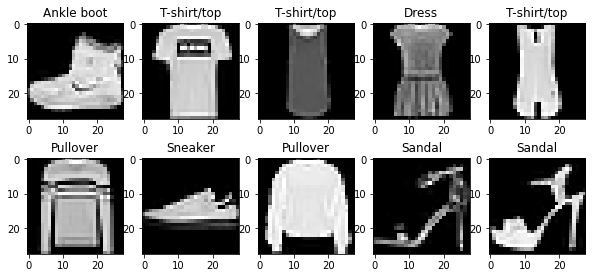

In [36]:
plt.figure(figsize=(10,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
plt.show()

# Building The Model

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Activation,MaxPool2D,Flatten
from keras import optimizers

In [49]:
model=Sequential()

model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding="valid"))
model.add(Activation("relu"))

model.add(Conv2D(filters=5,kernel_size=(3,3),strides=(1,1),padding="valid"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(1,1)))

model.add(Flatten())

model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [59]:
model.compile(optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

In [60]:
model.fit(x=x_train,y=y_train_ohe,batch_size=5000,validation_data=(x_test,y_test_ohe),epochs=20)

Epoch 1/20
12/12 [==============================] - 27s 2s/step - loss: 7.8870 - accuracy: 0.4398 - val_loss: 1.6472 - val_accuracy: 0.5470
Epoch 2/20
12/12 [==============================] - 29s 2s/step - loss: 1.2602 - accuracy: 0.5901 - val_loss: 0.9795 - val_accuracy: 0.6515
Epoch 3/20
12/12 [==============================] - 32s 3s/step - loss: 0.8596 - accuracy: 0.6943 - val_loss: 0.7973 - val_accuracy: 0.7132
Epoch 4/20
12/12 [==============================] - 31s 3s/step - loss: 0.7194 - accuracy: 0.7380 - val_loss: 0.6941 - val_accuracy: 0.7489
Epoch 5/20
12/12 [==============================] - 38s 3s/step - loss: 0.6305 - accuracy: 0.7729 - val_loss: 0.6333 - val_accuracy: 0.7767
Epoch 6/20
12/12 [==============================] - 37s 3s/step - loss: 0.5746 - accuracy: 0.7976 - val_loss: 0.5901 - val_accuracy: 0.7960
Epoch 7/20
12/12 [==============================] - 35s 3s/step - loss: 0.5348 - accuracy: 0.8102 - val_loss: 0.5630 - val_accuracy: 0.8042
Epoch 8/20
12/12 [==

<ipython-input-61-7684ecbb551a>:3: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Validation-Accuracy","Training-Accuracy")
<ipython-input-61-7684ecbb551a>:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Validation-Accuracy","Training-Accuracy")
<ipython-input-61-7684ecbb551a>:3: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Validation-Accuracy","Training-Accuracy")
<ipython-input-61-7684ecbb551a>:3: UserWarning: Legend does not support 'i' instances.
A

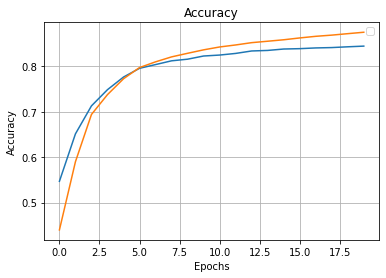

In [61]:
plt.plot(model.history.history["val_accuracy"])
plt.plot(model.history.history["accuracy"])
plt.legend("Validation-Accuracy","Training-Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

<ipython-input-62-d9a488e98778>:3: UserWarning: The handle 'd' has a label of '_' which cannot be automatically added to the legend.
  plt.legend("Validation_loss","Test_Loss")
<ipython-input-62-d9a488e98778>:3: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Validation_loss","Test_Loss")
<ipython-input-62-d9a488e98778>:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Validation_loss","Test_Loss")
<ipython-input-62-d9a488e98778>:3: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy

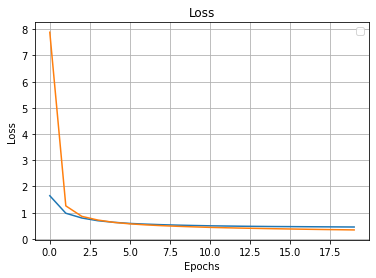

In [62]:
plt.plot(model.history.history["val_loss"])
plt.plot(model.history.history["loss"])
plt.legend("Validation_loss","Test_Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Prediction

In [71]:
import numpy as np

In [78]:
pred=model.predict(x_test[502].reshape(-1,28,28,1))

1/1 [==============================] - 0s 30ms/step


In [79]:
pred

array([[4.0031572e-12, 8.2113475e-19, 3.7717455e-12, 2.2640659e-15,
        2.4931100e-19, 9.9945921e-01, 2.2156479e-14, 4.8972917e-05,
        2.9611387e-04, 1.9567824e-04]], dtype=float32)

In [80]:
class_names[np.argmax(pred)]

'Sandal'

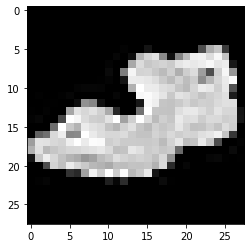

In [82]:
plt.imshow(x_test[502],cmap='gray')

In [ ]:
plt.figure(figsize=(10,12))
for i in range(10,20):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
plt.show()